## Tensorflow Araba Analizi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!ls "/gdrive/MyDrive/Calisma_ortami/"

Colab_Calisma_Ortami.ipynb  MNIST_YSA.ipynb	TensorflowArabaAnalizi.ipynb
merc.xlsx		    rakamtanima_cnn.py


In [ ]:
!ls

MyDrive


In [ ]:
dataFrame = pd.read_excel("/gdrive/MyDrive/Calisma_ortami/merc.xlsx")

In [ ]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [ ]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame.isnull()

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [ ]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 700x700 with 0 Axes>

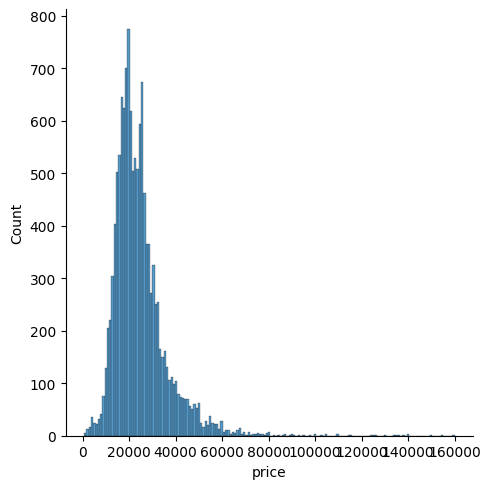

In [ ]:
plt.figure(figsize=(7,7))
sbn.displot(dataFrame["price"])

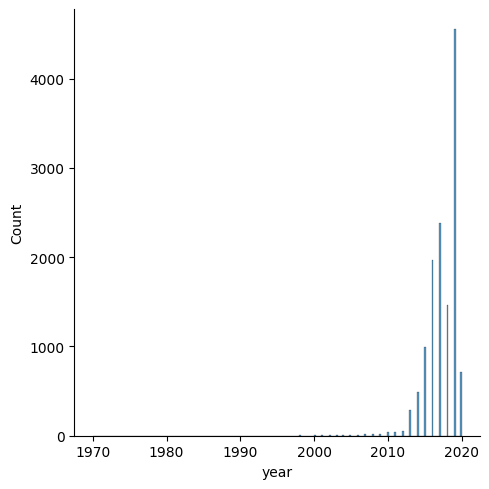

In [ ]:
sbn.displot(dataFrame["year"])

In [ ]:
dataFrame.corr()

<ipython-input-17-6bf2272b98ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
dataFrame.corr()["price"].sort_values()

<ipython-input-18-8576262b5b0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

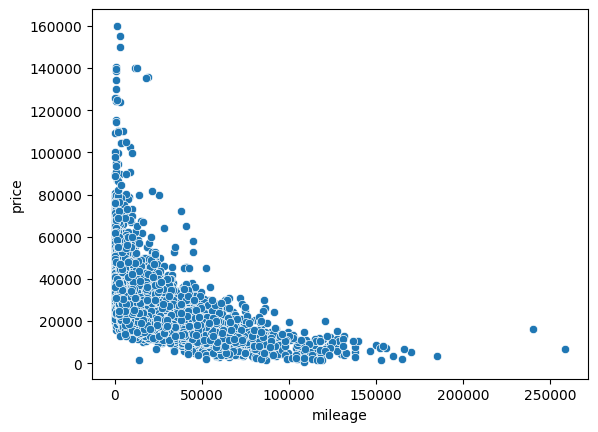

In [ ]:
sbn.scatterplot( x = "mileage" , y = "price" , data= dataFrame)

In [ ]:
dataFrame.sort_values("price", ascending= False).head(30)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [ ]:
len(dataFrame)

13119

In [ ]:
len(dataFrame) * 0.01

131.19

In [ ]:
kirpilmisDF= dataFrame.sort_values("price", ascending=False).iloc[131:]

In [ ]:
len(kirpilmisDF)

12988

In [ ]:
kirpilmisDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Figure size 700x500 with 0 Axes>

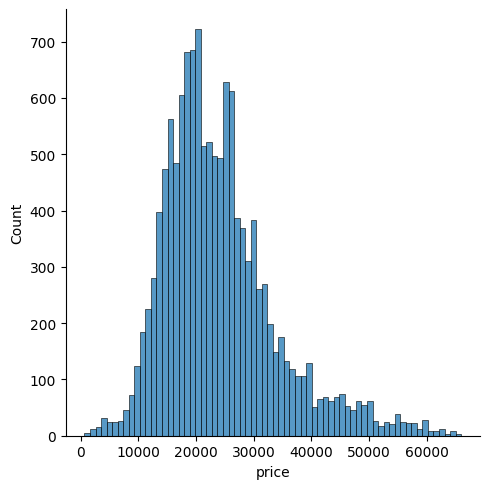

In [ ]:
plt.figure(figsize=[7,5])
sbn.displot(data=kirpilmisDF["price"])

In [ ]:
dataFrame[dataFrame.year == 1970].groupby("year").count()

,price,transmission,mileage,tax,mpg,engineSize
year,,,,,,
1970,1,1,1,1,1,1


In [ ]:
kirpilmisDF=       dataFrame.sort_values("price", ascending=False).iloc[130:]

,year,price,transmission,mileage,tax,mpg,engineSize
1932,2020,65995,Semi-Auto,200,145,31.7,3.0
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [ ]:
kirpilmisSonDF= kirpilmisDF[kirpilmisDF.year != 1970].groupby("year").mean()["price"]

<ipython-input-53-1d38bc1cb9cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kirpilmisSonDF= kirpilmisDF[kirpilmisDF.year != 1970].groupby("year").mean()["price"]


In [ ]:
kirpilmisSonDF

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [ ]:
kirpilmisSonDF.head()

year
1997    9995.000000
1998    8605.000000
1999    5995.000000
2000    5743.333333
2001    4957.900000
Name: price, dtype: float64

In [ ]:
kirpilmisDF= kirpilmisDF[kirpilmisDF.year != 1970]

In [ ]:
kirpilmisDF.groupby("year").mean()["price"]

<ipython-input-63-e8aa2597d176>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kirpilmisDF.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [ ]:
kirpilmisDF.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [ ]:
dataFrame= kirpilmisDF

In [ ]:
dataFrame.drop("transmission", axis=1, inplace= True)

KeyError: ignored

In [ ]:
y = dataFrame["price"].values
x= dataFrame.drop("price", axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state= 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)


In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
len(x_train)

9090

In [ ]:
model = Sequential()

model.add(Dense(12, activation= "relu")) # katman bunlar, 12 layer
model.add(Dense(12, activation= "relu")) # katman bunlar
model.add(Dense(12, activation= "relu"))  # katman bunlar
model.add(Dense(12, activation= "relu")) # katman bunlar

model.add(Dense(1)) #çıkış katmanı 1 tane

model.compile(optimizer="adam", loss="mse")


In [ ]:
model.fit(x=x_train, y=y_train,validation_data =(x_test, y_test), batch_size = 250, epochs=300)

Epoch 1/300
37/37 [==============================] - 2s 10ms/step - loss: 672145472.0000 - val_loss: 688104576.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672127360.0000 - val_loss: 688072064.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 672066048.0000 - val_loss: 687962048.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671864576.0000 - val_loss: 687611904.0000
Epoch 5/300
37/37 [==============================] - 0s 5ms/step - loss: 671285312.0000 - val_loss: 686672064.0000
Epoch 6/300
37/37 [==============================] - 0s 6ms/step - loss: 669836032.0000 - val_loss: 684444928.0000
Epoch 7/300
37/37 [==============================] - 0s 5ms/step - loss: 666627712.0000 - val_loss: 679814912.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 660353024.0000 - val_loss: 671159808.0000
Epoch 9/300
37/37 [==============================] - 0s 5ms/step - loss: 649188

In [ ]:
kayipVerisi= pd.DataFrame (model.history.history)

In [ ]:
kayipVerisi.head()

,loss,val_loss
0,672145472.0,688104576.0
1,672127360.0,688072064.0
2,672066048.0,687962048.0
3,671864576.0,687611904.0
4,671285312.0,686672064.0


<Axes: >

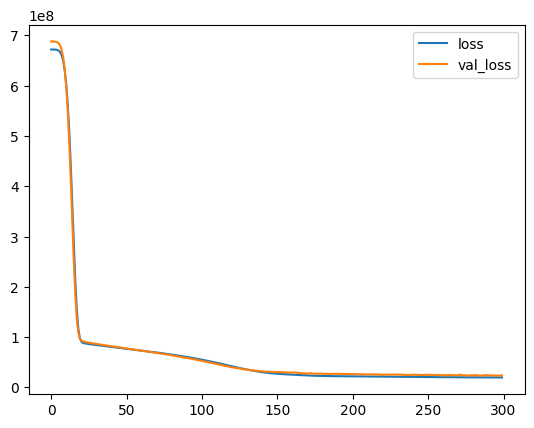

In [ ]:
kayipVerisi.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
tahminDizisi=model.predict(x_test)

122/122 [==============================] - 1s 3ms/step


In [ ]:
tahminDizisi

array([[20381.861],
       [23007.857],
       [24203.2  ],
       ...,
       [25022.682],
       [ 7710.841],
       [23998.146]], dtype=float32)

In [ ]:
mean_absolute_error(y_test, tahminDizisi)

3426.8132118732156

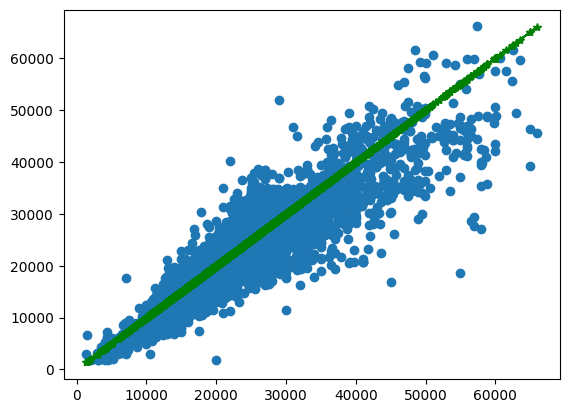

In [ ]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g*-")

In [ ]:
dataFrame.iloc[3]

year           2019.0
price         65000.0
mileage        3398.0
tax             145.0
mpg              27.2
engineSize        4.0
Name: 4727, dtype: float64

In [ ]:
secilenArabaSeries= dataFrame.drop("price", axis=1).iloc[3]

In [ ]:
secilenArabaSeries= scaler.transform(secilenArabaSeries.values.reshape(-1,5))

In [ ]:
model.predict(secilenArabaSeries)

1/1 [==============================] - 0s 43ms/step


array([[58228.293]], dtype=float32)